In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [5]:
df= pd.read_csv('salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
print('The dataset have {} columns and {} rows'.format(len(df.axes[1]),len(df.axes[0])))

The dataset have 15 columns and 32561 rows


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
numerics= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df= df.select_dtypes(include= numerics)
print('Number of columns which have only numeric values is {}'.format(len(numeric_df.columns)))

Number of columns which have only numeric values is 6


In [9]:
object_df= df.select_dtypes(include='object')
print('Number of columns which have only categorical values is {}'.format(len(object_df.columns)))

Number of columns which have only categorical values is 9


In [ ]:
Thus, this dataset contains 9 category categories that must be encoded into number columns.


In [ ]:
#DATASET DESCRIBE

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#CHECKING FOR UNIQUE VALUES IN CATEGORICAL COLUMNS

In [11]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [13]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [14]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [15]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
#Replacing ' ?' with null value

In [16]:
df['occupation']=df['occupation'].replace(' ?',np.NaN)
df['workclass']=df['workclass'].replace(' ?',np.NaN)
df['native-country']=df['native-country'].replace(' ?',np.NaN)

In [ ]:
Checking if ' ?' replaced with NaN

In [17]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [18]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

CHECKING FOR NULL VALUES

In [20]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

Workclass and occupation both have null values. Fill it up with mode.

In [21]:
workclass_mode= df['workclass'].mode()[0]
occupation_mode= df['occupation'].mode()[0]
native_mode= df['native-country'].mode()[0]

In [22]:
df['workclass']= df['workclass'].fillna(workclass_mode)
df['occupation']= df['occupation'].fillna(occupation_mode)
df['native-country']=df['native-country'].fillna(native_mode)

In [23]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

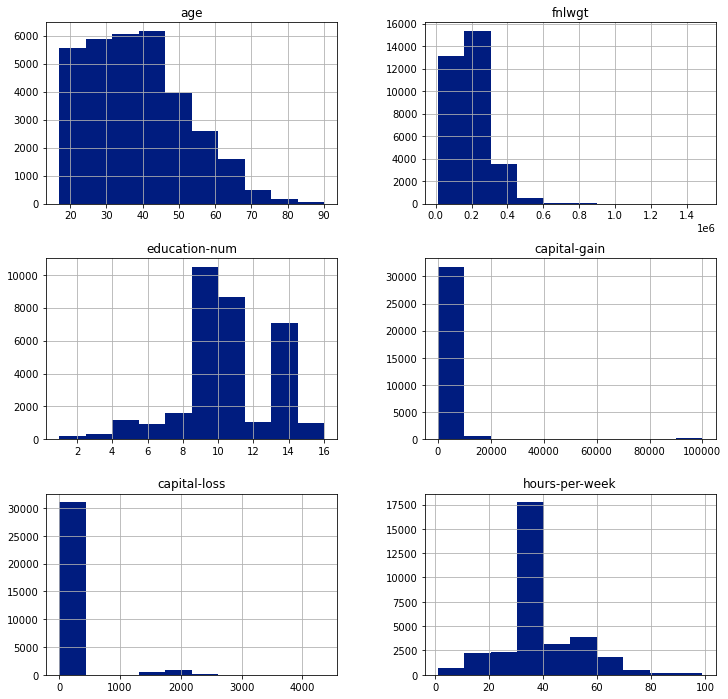

In [24]:
num_fea = df.select_dtypes(include=['int64', 'float64']).columns
plt.style.use("seaborn-dark-palette")
df[num_fea].hist(figsize = (12,12))
plt.show()

In [ ]:
#Since the string representation of edu-num is in the column education, we can remove it. We can also remove the fnlwgt column.

In [25]:
df.drop(['education','fnlwgt','capital-gain','capital-loss'], axis= 1, inplace = True)

In [26]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [ ]:
#SPLITING THE DATASET

In [27]:
X= df.drop('salary',axis=1)
y= df['salary']

In [ ]:
#Number of unique values present in categorical columns

In [28]:
obj_col=X.select_dtypes(include= ['object','bool'])
for x in obj_col.columns:
  print(x , obj_col.nunique())
  break

workclass workclass          8
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64


In [ ]:
#ENCODING

In [29]:
encoder= LabelEncoder()

In [30]:
encoder.fit(X['workclass'])

LabelEncoder()

In [31]:
encoder.classes_

array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [32]:
encoder.classes_= np.array([' Federal-gov',' State-gov',' Local-gov',' Private',' Self-emp-inc',' Self-emp-not-inc',' Without-pay',' Never-worked'])

In [33]:
encoder.classes_

array([' Federal-gov', ' State-gov', ' Local-gov', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' Without-pay',
       ' Never-worked'], dtype='<U17')

In [34]:
X['workclass']= encoder.transform(X['workclass'])

In [35]:
X=pd.get_dummies(X)

In [36]:
X

,age,workclass,education-num,hours-per-week,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,1,13,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,5,13,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,3,9,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,3,7,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,3,13,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,3,9,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,3,9,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,3,9,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state= 42)

In [38]:
X_train

,age,workclass,education-num,hours-per-week,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
19749,34,5,9,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1216,48,5,10,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27962,23,1,10,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23077,56,2,9,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10180,17,3,7,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,3,13,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5390,31,3,8,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
860,18,3,7,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15795,50,5,9,84,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#DECISION TREE

In [39]:
dc= DecisionTreeClassifier()

In [40]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred= dc.predict(X_test)

In [42]:
print(accuracy_score(y_test,y_pred))

0.7785853209130924


In [ ]:
#RANDOM FOREST

In [43]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8189169822909202


In [ ]:
#BAGGING CLASSIFIERS

#DECISION TREE

In [44]:
bagging_clf= BaggingClassifier(base_estimator=dc, n_estimators=100, random_state=40)
bagging_clf.fit(X_train,y_train)
y_pred= bagging_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8119561879414474


In [ ]:
#ADABOOSTER

In [45]:
ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train, y_train)
y_pred = ada_boost_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8418466577950661
